In [36]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [4]:
digits=load_digits()

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [9]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
df=pd.DataFrame(digits.data)
df["target"]=digits.target
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [16]:
from matplotlib import pyplot as plt


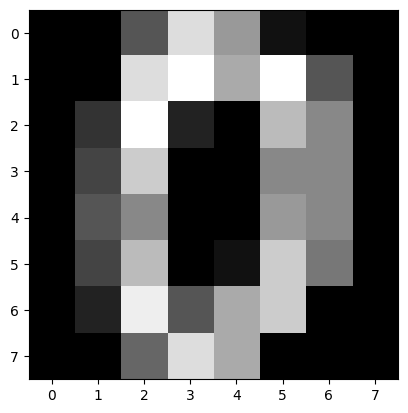

In [17]:
image=digits.images[0]
plt.imshow(image,cmap="gray")

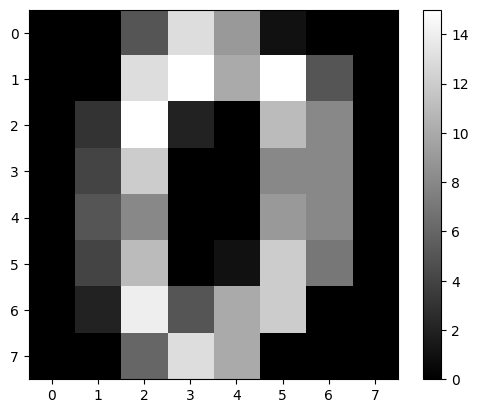

In [18]:
image=digits.images[0]
plt.imshow(image,cmap="gray")
plt.colorbar()
plt.show()

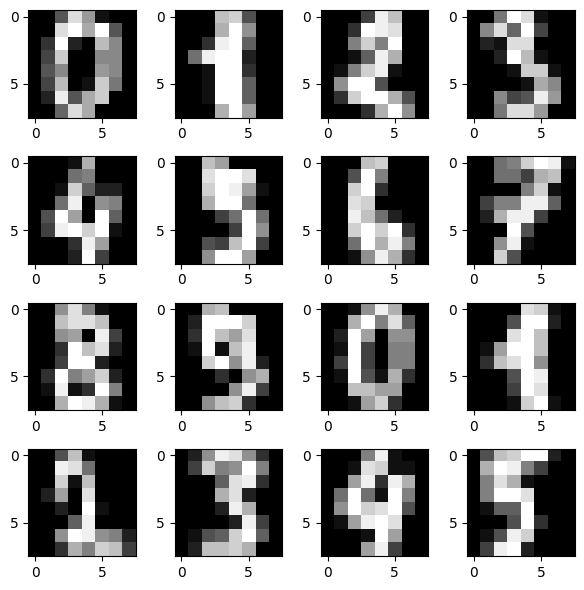

In [22]:
fig,axes=plt.subplots(4,4,figsize=(6,6))
for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap="gray")
    
plt.tight_layout()
plt.show()

In [28]:
X=df.drop("target",axis="columns")
X


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [29]:
y=df["target"]
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64

In [30]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [31]:
svm_model=SVC( C=10,kernel='rbf',gamma=0.001)

In [32]:
svm_model.fit(X_train,y_train)

SVC(C=10, gamma=0.001)

In [35]:
y_pred=svm_model.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred)

0.9861111111111112

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        41
           3       1.00      0.97      0.98        32
           4       1.00      1.00      1.00        26
           5       0.98      0.98      0.98        44
           6       0.97      0.95      0.96        40
           7       1.00      0.96      0.98        28
           8       0.97      1.00      0.99        35
           9       0.96      1.00      0.98        43

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [39]:
confusion_matrix(y_test,y_pred)

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 26,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 38,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 27,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 43]])

## USING GRIDSEARCH CV

In [41]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid={'C':[0.1,1,10,100],
           'gamma':[0.001,0.01,0.1,1]}
svm_modelg=SVC(kernel="rbf")

In [45]:
grid_search=GridSearchCV(svm_model,param_grid,cv=5,scoring="accuracy")

In [46]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(C=10, gamma=0.001),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [47]:
grid_search.best_params_

{'C': 1, 'gamma': 0.001}

In [48]:
best_svm=SVC(kernel="rbf",C=grid_search.best_params_["C"],gamma=grid_search.best_params_["gamma"])

In [49]:
best_svm.fit(X_train,y_train)

SVC(C=1, gamma=0.001)

In [50]:
best_svm.score(X_test,y_test)

0.9888888888888889

## cross validation

In [56]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [60]:
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [68]:
score_svm=[]
for train_index,test_index in kf.split(digits.data):
    X_train,X_test,y_train,y_test=digits.data[train_index],digits.data[test_index],digits.target[train_index],digits.target[test_index]
    score_svm.append(get_score(best_svm,X_train,X_test,y_train,y_test))

In [69]:
score_svm

[0.9682804674457429, 0.9799666110183639, 0.9632721202003339]

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
cv=cross_val_score(best_svm,digits.data,digits.target)

In [72]:
cv

array([0.975     , 0.95      , 0.98328691, 0.99164345, 0.96100279])

In [73]:
cv.mean()

np.float64(0.9721866295264624)